# Tarea 03: Evaluación de funciones

Fecha *límite* de entrega: **martes 28 de febrero del 2017, antes de las 15:00 horas**.

**No** se recibirán tareas enviadas después del inicio de la clase.

Manda un solo notebook de Jupyter con tus respuestas a las preguntas al ayudante.

Explica brevemente qué estás haciendo. Redacta oraciones completas en español, usando acentos. Utiliza ecuaciones con notación LaTeX cuando sea necesario.

El notebook debe ser ejecutable, es decir, cada celda debe correr sin errores, y debe reproducir la salida que aparece en la pantalla.

## 1. Polinomios 

En esta tarea, veremos cómo evaluar ciertas funciones en la computadora.

Las funciones más fáciles de tratar son los **polinomios**.

[1] Utiliza notación LaTeX en una celda de Markdown para escribir un polinomio $p_n$ de grado $n$ con coeficientes 
$a_0$, $a_1$, $\ldots$, $a_n$, donde $a_i$ es el coeficiente de $x^i$.

$p_n$ = $a_0$$x_0$ + $a_1$$x_1$ + $\ldots$ + $a_i$$x_i$ + $\ldots$ + $a_n$$x_n$

[2] (i) Escribe una función `evaluar_polinomio` que evalúa un polinomio de grado $2$, $p(x) = a + bx + c x^2$. La función debe aceptar como argumentos los valores de $a$, $b$ y $c$, así como el valor de $x$ donde evaluar. Verifica que funciona con el polinomio $p(x) = 1 + 2x - 3x^2$. [Pista, aquí la función se llama como sigue:

    evaluar_polinomio(a, b, c, x).
    
]

In [1]:
function evaluar_polinomio(a, b, c, x)
    p_x = a + b*x + c*x^2
    return p_x
end

evaluar_polinomio (generic function with 1 method)

In [2]:
evaluar_polinomio(1, 2, -3, 0)

1

(ii) Escribe una función `evaluar_polinomio` evalúa un polinomio de grado $n$.
Acepta un arreglo `a` de $n+1$ coeficients, en el orden `a_0`, `a_1`, etc., así como un valor `x`, y evalúa $p(x)$. [Pista: Recuerda que el $i$-ésimo elemento de un arreglo se accesa con `a[i]`, y el número de entradas de un arreglo es `length(a)`.] Verifica que funciona con el polinomio $p(x) = 1 + 2x - 3x^2$. [Pista: aquí, la función se llama como sigue: 

    evaluar_polinomio([1, 2, -3], x)
]

In [3]:
function evaluar_polinomio_n(coef::Array{Int64,1}, x)
    p_x = 0
    for i in 1:length(coef)
        p_x += coef[i] * x^(i-1)
    end
    return p_x
end

evaluar_polinomio_n (generic function with 1 method)

In [4]:
evaluar_polinomio_n([1, 2, -3], 1)

0

(iii) Verifica que funciona con un polinomio cúbico.

In [5]:
evaluar_polinomio_n([1, 2, 3, 1], 1)

7

[3] Otra manera de evaluar un polinomio es con el llamado [**algoritmo de Horner**](https://es.wikipedia.org/wiki/Algoritmo_de_Horner). La idea es que es ineficiente calcular `xˆ3` desde cero, si ya contamos con el resultado de `xˆ2`.

(i) Escribe una función para evaluar una función `evaluar_actualizar` usando esta idea: empieza desde el coeficiente de $x^0$, y guarda el valor actual de la potencia de `x` en una variable que vas actualizando.

In [6]:
function evaluar_actualizar(coef::Array{Int64,1}, x)
    p_x = coef[1]
    #@show p_x
    for i in 2:length(coef)
        p_x += coef[i] * x^(i-1)
        #@show p_x
    end
    return p_x
end

evaluar_actualizar (generic function with 1 method)

In [7]:
evaluar_actualizar([1, 2, -3], 1)

0

(ii) Utiliza la descripción del algoritmo en la liga para escribir una función `evaluar_horner` que implementa el método de Horner (que se supone es aún más eficiente que la (i)), con la misma estructura que la función de la pregunta 2(ii). Verifica que da las mismas respuestas que las funciones de la pregunta 2.

In [8]:
function evaluar_horner(coef::Array{Int64,1}, x)

    h = 0
    n = length(coef)
    for k in 0:n-1
        h += (coef[n-k]) * (x^(k+1)) 
   
    end
    return h
end

evaluar_horner (generic function with 1 method)

In [9]:
evaluar_horner([1, 2, -3], 1)

0

[4] ¿Cuál de estos tres algoritmos es "mejor"? Aquí, por "mejor" entenderemos "más rápido".
Para verificarlo, utiliza el paquete `BenchmarkTools.jl`, y utiliza `@benchmark f($a, $x)` para ver cuánto tiempo se tarda cada función. (Debes poner explícitamente los signos `$`.) 

In [10]:
@time evaluar_polinomio(1, 2, -3, 0)

  0.000006 seconds (130 allocations: 7.719 KB)


1

In [11]:
@time evaluar_polinomio_n([1, 2, -3], 0)

  0.000006 seconds (5 allocations: 272 bytes)


1

In [12]:
@time evaluar_actualizar([1, 2, -3], 0)

  0.000006 seconds (5 allocations: 272 bytes)


1

In [13]:
@time evaluar_horner([1, 2, -3], 0)

  0.000005 seconds (5 allocations: 272 bytes)


0

Usé "@time" porque tuve problemas al intentar utilizar BenchmarkTools.
Pero con time, la función más "eficiente" (rápida) es evaluar_horner.

In [ ]:
#Pkg.add("BenchmarkTools");

In [ ]:
#Pkg.update()

In [14]:
using BenchmarkTools

In [8]:
@benchmark evaluar_polinomio($1, $2, $-3, $0)

LoadError: syntax: missing comma or ) in argument list

In [6]:
@benchmark evaluar_polinomio_n([$1, $2, $-3], $0)

LoadError: syntax: missing separator in array expression

## 2. Funciones elementales

¿Cómo evalúa una computadora la función exponencial? No hay ninguna forma fácil y exacta de evaluarla. Por eso debemos usar **aproximaciones**. Normalmente, aproximamos las funciones complicadas (o sea, ¡las que no sean polinomios!) por las únicas funciones con las cuales sí sabemos trabajar, los polinomios.

Un primer tipo de aproximación es mediante las **series de Taylor**. (Ojo: no es la mejor solución, ni la que se utiliza realmente.)

[5] Recuerda que la función exponencial se define mediante una serie de Taylor. Escribe esta serie de Taylor con notación LaTeX.

$e^x = 1 + \frac{1}{1!}x + \frac{1}{2!}x^2 + \frac{1}{3!}x^3 + \ldots + \frac{1}{i!}x^i + \ldots + \frac{1}{n!}x^n$

Podemos aproximar la serie de Taylor con un **polinomio de Taylor** de grado $n$, que se obtiene al truncar la serie y retener sólo los términos de grado $\le n$.

[6] Escribe una función para calcular el polinomio de Taylor de la función exponencial de orden $n$, evaluada en $x$. Utiliza una de las funciones de la preguntas 2 o 3 para evaluar el polinomio.

In [2]:
function pol_Taylor(x, n)
    e = 1
    for i in 1:n
        e += 1/(factorial(i)) * x^i
    end
    return e
end

pol_Taylor (generic function with 1 method)

In [3]:
pol_Taylor(1, 20)

2.7182818284590455

[7] ¿Cuál valor de $n$ nos da una buena aproximación? Podemos esperar que dependerá de $x$. Para saberlo, haz lo siguiente.

(i) Dibuja la función $\exp(x)$ y las aproximaciones con distintas $n$s. Puedes usar también `@manipulate`. ¿Qué valor de $n$ parece que necesites para tener una buena aproximación de `exp(1)`? Para `exp(5)`?

In [8]:
pol_Taylor(5, 20)

148.4131470673818

In [1]:
Pkg.add("GR")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of GR
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [4]:
using Plots
pyplot()
#gr()

Plots.PyPlotBackend()

In [5]:
using LaTeXStrings

In [6]:
using Interact

In [7]:
x = []
y = []
for i in 1:5
    xx = i
    yy = pol_Taylor(i, 20)
    push!(x, xx)
    push!(y, yy)
    #@show x, y
    #plot!(x, y)
end
return x, y


(Any[1,2,3,4,5],Any[2.71828,7.38906,20.0855,54.5981,148.413])


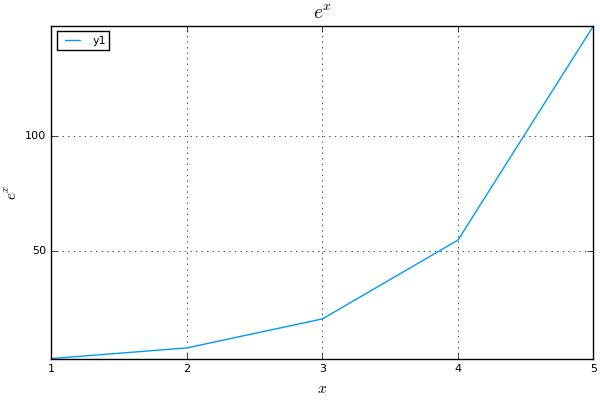

In [15]:
plot(x, y, title=L"e^x", xlabel=L"x", ylabel=L"e^x")

En esta parte no pude usar manipulate...

In [7]:
#Para exp(1) y variamos n
x = 1
y = pol_Taylor(1, 5)
fig = plot(x, y)
@manipulate for n in 1:5
    fig
end

LoadError: In convertToAnyVector, could not handle the argument types: (Float64,)

In [ ]:
#Para exp(5) y variamos n
@manipulate for n in 1:5
    x = 5
    y = pol_Taylor(5, 5)
    plot(x, y)
end

(ii) Escribe una función que calcula la función exponencial que va variando $n$ *hasta que* la diferencia entre $p_{n-1}(x)$ y $p_n(x)$ sea menor que una tolerancia (la cual también es argumento de la función). ¿Concuerda con tu observación de la pregunta (i)?

In [ ]:
function exponencial(x, tol)
   
    p_act = 1/(factorial(2)) * x^2
    p_ant = 1/(factorial(1)) * x^1
    e = 1 + p_ant + p_act
    
        while p_ant - p_act >= tol
            p_act = p_ant
            p_act = 1/(factorial(i)) * x^i
            e += p_act
        end
    end
    return e
end

In [21]:
function exponencial(x, tol)
   
    p_act = 1/(factorial(2)) * x^2
    p_ant = 1/(factorial(1)) * x^1
    e = 1 + p_ant + p_act
    
    for i in 3:100
        while p_ant - p_act >= tol
            p_act = p_ant
            p_act = 1/(factorial(i)) * x^i
            e += p_act
        end
    end
    return e
end

exponencial (generic function with 1 method)

In [ ]:
exponencial(1, 0.5)

[8] Lo que acabamos de hacer es muy ineficiente -- ¿por qué?

Una mejor manera de hacerlo es parecido al método de Horner: vamos guardando el valor actual del $i$-ésimo término y lo actualizamos durante el cálculo.

(i) Implementa la función exponencial así, hasta que el tamaño del nuevo término sea menor que cierta tolerancia. Verifica que funciona.

[9] La función exponencial también sirve para números complejos. En Julia, $i$, la raíz cuadrada de $-1$, se escribe como `im`.

(i) Utiliza esto para escribir una función `mi_sin(x)` para calcular $\sin(x)$.

In [6]:
function mi_sin(x, n)
    s = 0
    for i in 0:n
        s += (-1)^i * x^(2i+1)/(factorial(2i+1)) 
    end
    return s
end

mi_sin (generic function with 1 method)

In [7]:
mi_sin(1, 2)

0.8416666666666667

[10] Aunque estamos llevando a cabo cálculos con números de punto flotante, podemos lograr ciertas **garantías** sobre los resultados.

(i) Escribe el teorema de Taylor con la forma del término complementario de Lagrange para un polinomio de Taylor $p_2(x)$ de grado 2, con término complementario de orden 3.

$p_2(x) = f(x_0) + \frac{f'(x_0)}{1!} (x - x_0) + \frac{f''(x_0)}{2!} (x - x_0)^2 + \frac{f^3(x)}{3!} (x - x_0)^3$ 

(ii) Considera la función $\exp$ en el rango $I = [-\frac{1}{2}, \frac{1}{2}]$. Encuentra una cota superior, $d$, para el término complementario en $I$. [Pista: Cuál es el valor máximo del término complementario sobre todo el intervalo?] 

(iii) Dibuja un "tubo" entre $p_2(x) - d$ y $p_2(x) + d$. Esto representa una región en la cual, de forma **garantizada**, cae $\exp$ dentro del intervalo $I$. Dibuja $\exp$ encima.

[En `Plots.jl`, para rellenar la región entre la función `f` y la función `g`, puedes utilizar `plot(xx, f.(xx), fillrange=g.(xx), alpha=0.3)`, donde `xx` son las coordenadas `xx` de los puntos. Aquí, `alpha` corresponde al grado de transparencia de la región rellenada.]

** Opcional: ¿Qué ocurre si haces lo mismo para un grado de polinomio de Taylor superior con su cota correspondiente. Puedes utilizar `@manipulate`.